# Read data

In [83]:
# !gdown --id 1NlyCS-fuTsupwHDcYx0ecpnsTAi5Ls6V

# Import library

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [85]:
# Read data
data = pd.read_csv('Real_estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Explore data

In [86]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Preprocessing data

# Feature engineering

In [87]:
# feature selection (X, y)
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [88]:
print(X.shape)
print(y.shape)

(414, 6)
(414,)


# Train linear Regression

Ở đây code mẫu đã sử dụng thư viện Sklearn và dùng LinearRegression train model. **Anh chị hãy thay thế phần training này bằng kiến thức đã học trên lớp (Training với 1-sample, m-samples hoặc N-samples)** và đối chiếu kết quả ở phần Evaluation.


In [89]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(331, 6) (331,)
(83, 6) (83,)


# Normalization data

In [91]:
# Using MinMaxScaler to scale data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[0.81877729, 0.30136986, 0.26130607, 0.2       , 0.38839069,
        0.46549493],
       [0.54585153, 0.30365297, 0.07252509, 0.5       , 0.40087252,
        0.68837611],
       [1.        , 0.05936073, 0.07890517, 0.4       , 0.51357247,
        0.79922364],
       [0.81877729, 0.07990868, 0.11353379, 0.3       , 0.52484246,
        0.82143627],
       [0.72707424, 0.39954338, 0.15041407, 0.        , 0.37542414,
        0.81539789]])

# Training

In [95]:
class LinearRegression:
   def __init__(self, batch_size, weights=None, bias=None, learning_rate=0.01, n_iters=1000):
      self.lr = learning_rate
      self.n_iters = n_iters
      self.weights = weights
      self.batch_size = batch_size
      self.bias = bias
      self.losses = []

   def fit(self, X, y):
      n_samples, n_features = X.shape
      # Initialize weights and bias
      self.weights = np.zeros(n_features)
      self.bias = 0
      
      for _ in range(self.n_iters):
         # Randomly choose batch
         random_index = np.random.choice(n_samples, self.batch_size)
         print(random_index)
         X_batch = X[random_index]
         y_batch = y[random_index]
         print(X_batch.shape, y_batch.shape)
         
         # Calculate y_predicted
         y_predicted = np.dot(X_batch, self.weights) + self.bias
         
         # Calculate loss
         loss = self.loss(y_predicted, y_batch)
         self.losses.append(loss)
         
         # Calculate gradients
         dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_predicted - y_batch))
         db = (1 / self.batch_size) * np.sum(y_predicted - y_batch)
         
         # Update weights and bias
         self.weights -= self.lr * dw
         self.bias -= self.lr * db
         
   def loss(self, y_predicted, y):
      return np.mean((y_predicted - y)**2)
   
   def plot_loss(self):
      plt.plot(self.losses)
      plt.xlabel("Iteration")
      plt.ylabel("Mean Squared Error")
      plt.show()
   
   def predict(self, X):
      y_predicted = np.dot(X, self.weights) + self.bias
      return y_predicted
   
   def evaluate(self, X, y):
      y_predicted = np.dot(X, self.weights) + self.bias
      return self.loss(y_predicted, y)
   
   def report_results(self, y_predicted, y_test):
      print("MSE: ", self.loss(y_predicted, y_test))
      print("RMSE: ", np.sqrt(self.loss(y_predicted, y_test)))
      print("MAE: ", np.mean(np.abs(y_predicted - y_test)))

In [96]:
# weights = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
# bias = np.mean(y_train - np.dot(X_train, weights))

# print(weights)
# print(bias)

In [97]:
model = LinearRegression(learning_rate=0.01, n_iters=1000, batch_size=32)
model.fit(X_train, y_train)

[111 259 231 175 147 125 249  69 230 167  51 227 255  73 220  47 301  60
  98 148 221  40 263 118 279 201 189 308  70 328 309 131]
(32, 6) (32,)
[ 93 197   7  56  89  52 189  91 267  94 195 212 246 217  74 172 273  32
 146 210   3 178 224 231  71  64 272 320 316 136  99 279]
(32, 6) (32,)
[ 40 183 236 109 315 226  35 136  45 266 280  72 248 207 278 243 327 279
  47 307 116  48 105 326 288 201 199  20  94 229 111 214]
(32, 6) (32,)
[254  70  77 262 197 117 278  29 179  31  88 127 311  33  64   2 125  13
 260 296  79 261 184 170 209 289 141 228 179 131 244 102]
(32, 6) (32,)
[264 229 194 315 159 155 305 115 249 312  77 209 125 107 129 118  37 245
 123  53  71 166 145  96 130 255 313 279 183  13 259 258]
(32, 6) (32,)
[ 91  47 277  97  16 324 129 186 276 146 297  36 176  62 144  99 215 306
 188 156  54 195 234 289 119  52 318 275  95 287 304  82]
(32, 6) (32,)
[251  79 172 304 119  60 161 261 169 201  78 280  45   0 169 220 303  61
  35 213 154 104 151 112 158  59 220 210  22 137 318  30]

# Evaluation

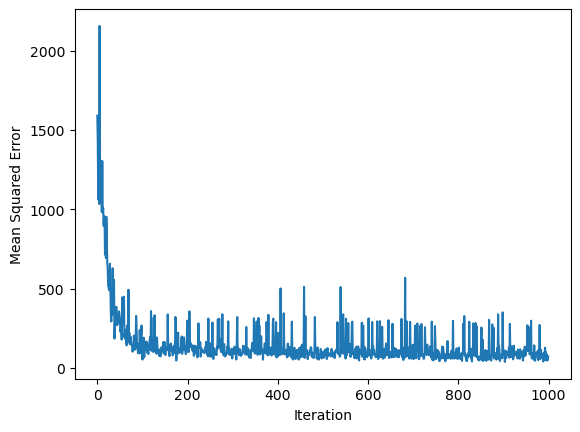

In [98]:
model.plot_loss()

# Predict

In [99]:
y_predicted = model.predict(X_test)
model.report_results(y_predicted, y_test)

MSE:  66.15339750087166
RMSE:  8.133473888866408
MAE:  6.283666532600106


# Visualization

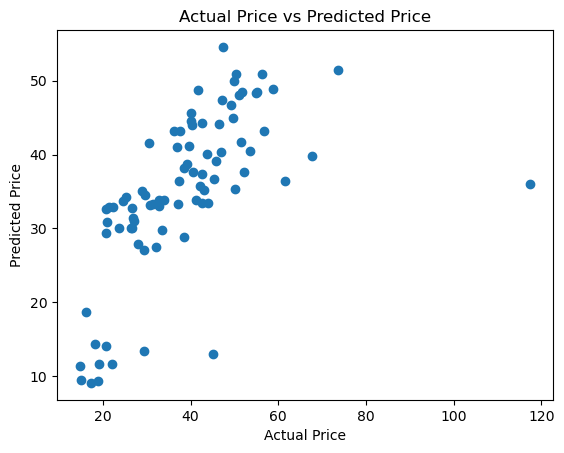

In [ ]:
plt.scatter(y_test, y_predicted)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()